# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import time

# Regression/Modelling libraries
from scipy.stats import linregress
import seaborn as sns

# Visualization
import matplotlib.pyplot as plt

#API
import requests
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [19]:
NUM_POINTS = 1500    # DEBUG 1500
BASE_URL = f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}"
# print(BASE_URL)

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=NUM_POINTS)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=NUM_POINTS)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 569


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
cities

['dwarka',
 'blackmans bay',
 'bethel',
 'opole',
 'longyearbyen',
 'adamstown',
 'isafjordur',
 'taiohae',
 'wailua homesteads',
 'sitka',
 'chachapoyas',
 'suizhou',
 'marsaskala',
 'anadyr',
 'tindouf',
 'iquique',
 'saldanha',
 'al hazm',
 'hommersak',
 'port-aux-francais',
 'grytviken',
 'puerto natales',
 'talnakh',
 'waitangi',
 'tiksi',
 'badger',
 'ocean pointe',
 'avarua',
 'hawaiian paradise park',
 'bardai',
 'mrakovo',
 'papatowai',
 'tual',
 'terrace',
 'dryden',
 'mukalla',
 'college',
 'jamestown',
 'caleta de carquin',
 'korla',
 'greymouth',
 'bilibino',
 'washington',
 'puerto san carlos',
 'fortuna',
 'iskateley',
 'novaya lyalya',
 'saipan',
 'karratha',
 'bestobe',
 'puerto ayora',
 'pervari',
 'laojunmiao',
 'yellowknife',
 'point pedro',
 'kandyagash',
 'mermoz boabab',
 'constantia',
 'kadi',
 'albany',
 'hermanus',
 'sudzha',
 'ushuaia',
 'port lincoln',
 'aweil',
 'presidencia de la plaza',
 'uturoa',
 'laguna salada',
 'kingston',
 'ilulissat',
 'whitehorse'

In [22]:
# Prepare the API and create city_url
city_url = f"{BASE_URL}&q={city}"
print(city_url)


https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f7765cb63c43d8f90c1506769919805b&q=avarua


In [23]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Step 1: Create endpoint URL with each city
    city_url = f"{BASE_URL}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Step 2: Make API request
        city_response = requests.get(city_url)

        # Step 3: Check the status code of the response
        if city_response.status_code == 200:
            city_weather = city_response.json()

            # Process the response data - Per Prof learned in class
            # Add the data to your lists -Per Prof learned in class
        else:
            city_weather = {}  # If failed request

        # Step 4: Parse the JSON and retrieve data
        lat = city_weather.get("coord", {}).get("lat")
        lon = city_weather.get("coord", {}).get("lon")
        max_temp = city_weather.get("main", {}).get("temp_max")
        humidity = city_weather.get("main", {}).get("humidity")
        pressure = city_weather.get("main", {}).get("pressure")
        cloudiness = city_weather.get("clouds", {}).get("all")
        wind_speed = city_weather.get("wind", {}).get("speed")
        country = city_weather.get("sys", {}).get("country")
        date = city_weather.get("dt")

        # Step 5: Append the City information into city_data list
        city_data.append({
            "City": city,
            "Latitude": lat,
            "Longitude": lon,
            "Max_Temperature": max_temp,
            "Humidity": humidity,
            "Pressure": pressure,
            "Cloudiness": cloudiness,
            "Wind Speed": wind_speed,
            "Country": country,
            "Date": date
        })

        # Step 6: Print success message - Per Prof learned in class
        print(f"{city} Success")

    except Exception as e:
        print(f"{city} City not found. Skipping")
        print(e)
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | dwarka
dwarka Success
Processing Record 2 of Set 1 | blackmans bay
blackmans bay Success
Processing Record 3 of Set 1 | bethel
bethel Success
Processing Record 4 of Set 1 | opole
opole Success
Processing Record 5 of Set 1 | longyearbyen
longyearbyen Success
Processing Record 6 of Set 1 | adamstown
adamstown Success
Processing Record 7 of Set 1 | isafjordur
isafjordur Success
Processing Record 8 of Set 1 | taiohae
taiohae Success
Processing Record 9 of Set 1 | wailua homesteads
wailua homesteads Success
Processing Record 10 of Set 1 | sitka
sitka Success
Processing Record 11 of Set 1 | chachapoyas
chachapoyas Success
Processing Record 12 of Set 1 | suizhou
suizhou Success
Processing Record 13 of Set 1 | marsaskala
marsaskala Success
Processing Record 14 of Set 1 | anadyr
anadyr Success
Processing Record 15 of Set 1 | tindouf
tindouf Success
Processing Record 16 of Set 1 | iquique
iquique Success
Proces

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City               569
Latitude           540
Longitude          540
Max_Temperature    540
Humidity           540
Pressure           540
Cloudiness         540
Wind Speed         540
Country            540
Date               540
dtype: int64

In [8]:
#city_data_df.dropna(inplace=True)

In [25]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max_Temperature,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
0,dwarka,22.2394,68.9678,84.42,85.0,1004.0,1.0,16.26,IN,1.717255e+09
1,blackmans bay,-43.0167,147.3167,44.73,86.0,1026.0,5.0,5.01,AU,1.717255e+09
2,bethel,41.3712,-73.4140,76.98,47.0,1020.0,0.0,5.75,US,1.717254e+09
3,opole,50.5000,18.0000,71.08,54.0,1009.0,32.0,10.56,PL,1.717255e+09
4,longyearbyen,78.2186,15.6401,37.24,87.0,1015.0,100.0,2.30,SJ,1.717255e+09


In [59]:
# Export the City_Data into a csv
import os
output_dir = "output_data3"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the City_Data DataFrame to a CSV file in the output_data directory
city_data_df.to_csv(os.path.join(output_dir, "cities.csv"), index_label="City_ID")


In [60]:
# Read saved data
city_data_df = pd.read_csv("output_data3/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max_Temperature,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,dwarka,22.2394,68.9678,84.42,85.0,1004.0,1.0,16.26,IN,1.717255e+09
1,blackmans bay,-43.0167,147.3167,44.73,86.0,1026.0,5.0,5.01,AU,1.717255e+09
2,bethel,41.3712,-73.4140,76.98,47.0,1020.0,0.0,5.75,US,1.717254e+09
3,opole,50.5000,18.0000,71.08,54.0,1009.0,32.0,10.56,PL,1.717255e+09
4,longyearbyen,78.2186,15.6401,37.24,87.0,1015.0,100.0,2.30,SJ,1.717255e+09


In [37]:
city_data_df.columns

Index(['City', 'Latitude', 'Longitude', 'Max_Temperature', 'Humidity',
       'Pressure', 'Cloudiness', 'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [35]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             569 non-null    object 
 1   Latitude         540 non-null    float64
 2   Longitude        540 non-null    float64
 3   Max_Temperature  540 non-null    float64
 4   Humidity         540 non-null    float64
 5   Pressure         540 non-null    float64
 6   Cloudiness       540 non-null    float64
 7   Wind Speed       540 non-null    float64
 8   Country          537 non-null    object 
 9   Date             540 non-null    float64
dtypes: float64(8), object(2)
memory usage: 48.9+ KB


In [42]:
city_data_df.loc[city_data_df['Latitude'].isnull()]

,City,Latitude,Longitude,Max_Temperature,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
7,taiohae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,marsaskala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,ocean pointe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,puerto san carlos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,outapi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,fonadhoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,port glaud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,kataragama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
city_data_df.count()

City               569
Latitude           540
Longitude          540
Max_Temperature    540
Humidity           540
Pressure           540
Cloudiness         540
Wind Speed         540
Country            537
Date               540
dtype: int64

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

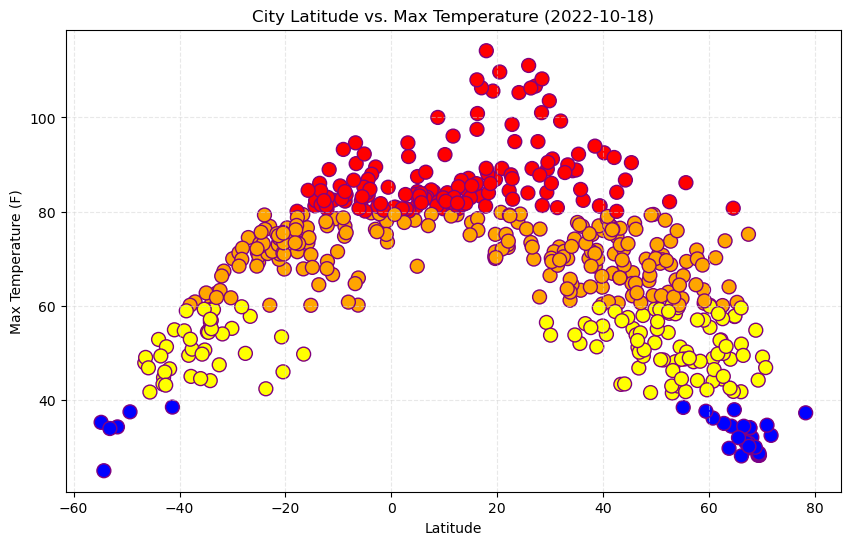

In [70]:
# Build scatter plot for latitude vs. temperature
# Define the output directory where you want to save the image
output_dir = "output_images3"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Color scheme to show Max Temp comparisson
def color_temp(val):
    if val < 40 :
        return 'blue'
    if val < 60:
        return 'yellow'
    elif val < 80:
        return 'orange'
    else:
        return 'red'

colors = city_data_df["Max_Temperature"].apply(color_temp)

plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Latitude"], city_data_df["Max_Temperature"], c=colors, edgecolors='purple',s=100)
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig(os.path.join(output_dir, "Fig1.png"))

# Show plot
plt.show()

#### Latitude Vs. Humidity

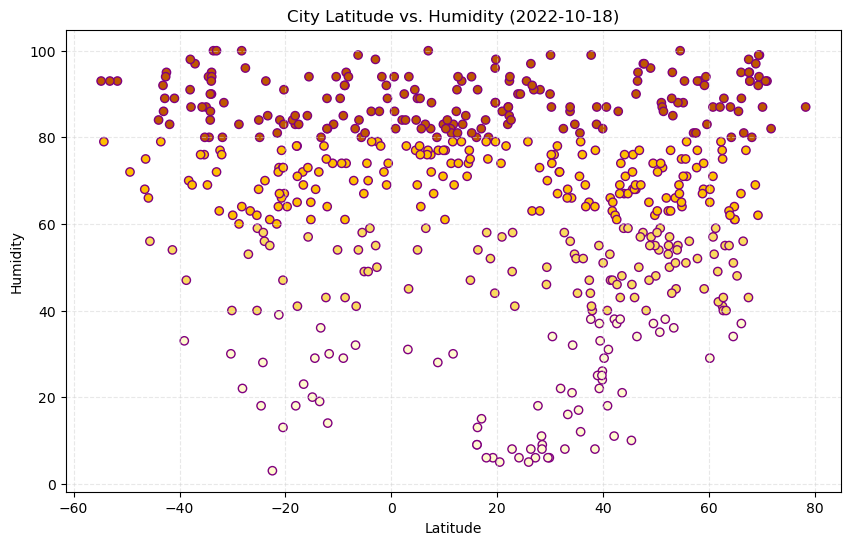

In [74]:
# Build scatter plot for latitude vs. humidity
# Define the output directory where you want to save the image
output_dir = "output_images3"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Color scheme to show Max Temp comparisson
def color_temp(val):
    if val < 40 :
        return '#FFFACD'
    if val < 60:
        return '#FADA5E'
    elif val < 80:
        return '#FFBF00'
    else:
        return '#BF5700'

colors = city_data_df["Humidity"].apply(color_temp)

plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Latitude"], city_data_df["Humidity"], c=colors, edgecolors='purple')
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig(os.path.join(output_dir, "Fig2.png"))

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

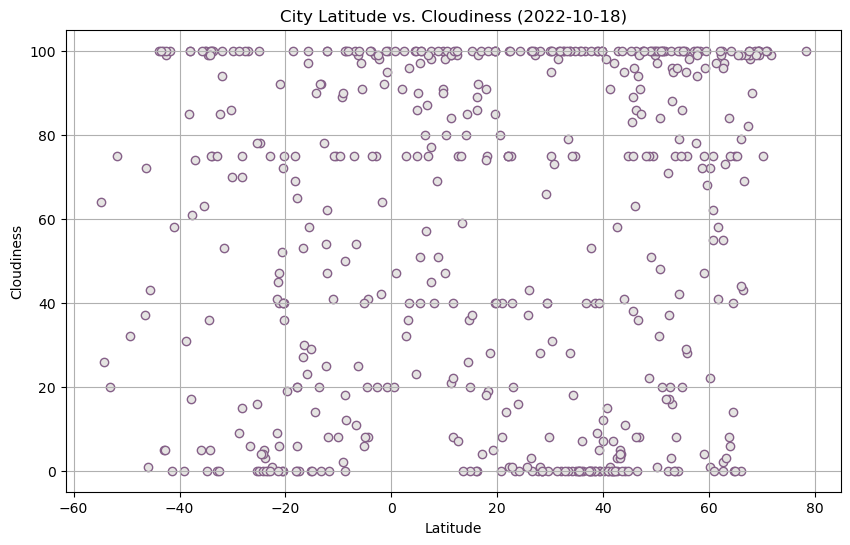

In [153]:
# Build the scatter plots for latitude vs. cloudiness
# Define the output directory where you want to save the image
output_dir = "output_images3"

# Create the output directory if it doesn't exist
#if not os.path.exists(output_dir):
    #os.makedirs(output_dir)


# Incorporate the other graph properties
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Latitude"], city_data_df["Cloudiness"], color='#E5E4E2', edgecolors='#856088')
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig(os.path.join(output_dir, "Fig3.png"))

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

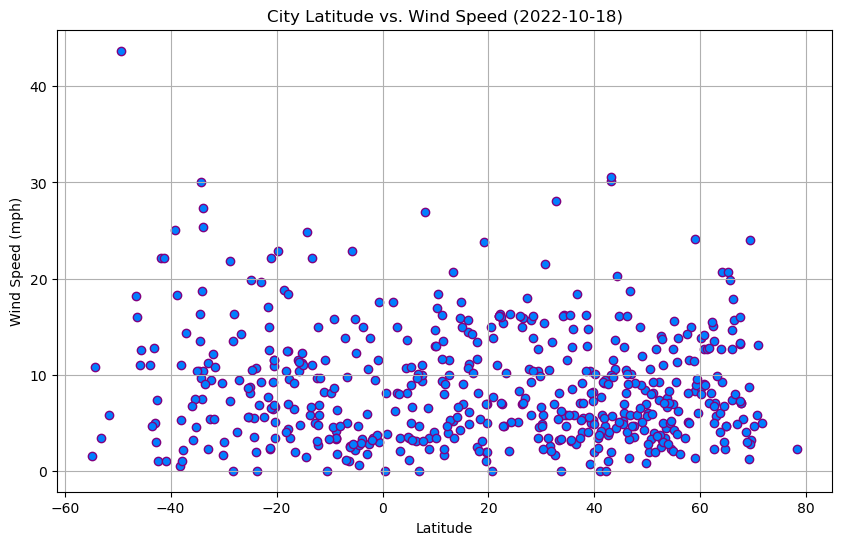

In [76]:
# Build the scatter plots for latitude vs. wind speed
# Define the output directory where you want to save the image
output_dir = "output_images3"

# Create the output directory if it doesn't exist
#if not os.path.exists(output_dir):
    #os.makedirs(output_dir)

# Incorporate the other graph properties
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Latitude"], city_data_df["Wind Speed"], color='#007FFF', edgecolors='purple')
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig(os.path.join(output_dir, "Fig4.png"))
#plt.savefig(os.path.join(output_dir, "latitude_vs_wind_speed.png")) - If you want to use titles instead.

# Show plot
plt.show()

# Requirement 2: Compute Linear Regression for Each Relationship


In [158]:
# Define a function to create Linear Regression plots
def chart(x,y):
    lr = linregress(x,y)
    regress_values = x * lr.slope + lr.intercept
    
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    
    line_eq = "y = " + str(round(lr.slope,2)) + "x + " + str(round(lr.intercept,2))
    plt.annotate(line_eq, (min(x), min(y)), fontsize=12, color="red")
    
    print(f"The r-value is: {lr.rvalue}")
    plt.show()

The r-value is: -0.7461578725684699


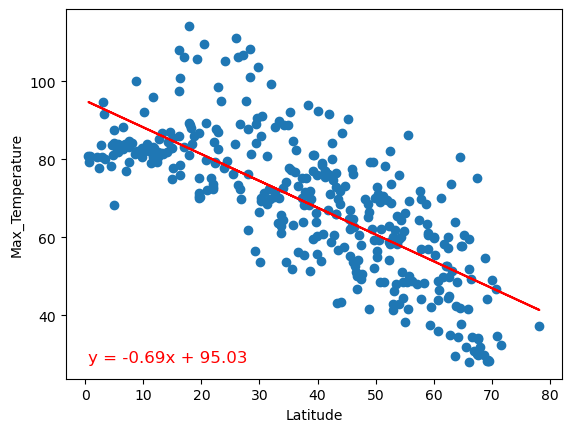

,City,Latitude,Longitude,Max_Temperature,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,dwarka,22.2394,68.9678,84.42,85.0,1004.0,1.0,16.26,IN,1.717255e+09
2,bethel,41.3712,-73.4140,76.98,47.0,1020.0,0.0,5.75,US,1.717254e+09
3,opole,50.5000,18.0000,71.08,54.0,1009.0,32.0,10.56,PL,1.717255e+09
4,longyearbyen,78.2186,15.6401,37.24,87.0,1015.0,100.0,2.30,SJ,1.717255e+09
6,isafjordur,66.0755,-23.1240,51.84,37.0,1007.0,0.0,12.66,IS,1.717255e+09


In [159]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df.Latitude>0]

x = northern_hemi_df.Latitude
y = northern_hemi_df.Max_Temperature

chart(x,y)

# Display sample data
northern_hemi_df.head()

The r-value is: 0.8433719708125711


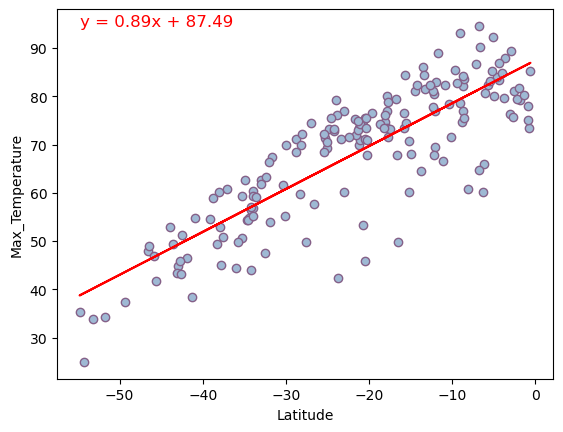

,City,Latitude,Longitude,Max_Temperature,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,44.73,86.0,1026.0,5.0,5.01,AU,1.717255e+09
5,adamstown,-25.0660,-130.1015,69.28,68.0,1014.0,100.0,8.70,PN,1.717255e+09
10,chachapoyas,-6.2317,-77.8690,65.89,54.0,1019.0,25.0,2.53,PE,1.717255e+09
15,iquique,-20.2208,-70.1431,67.78,67.0,1014.0,36.0,6.64,CL,1.717255e+09
16,saldanha,-33.0117,17.9442,62.65,72.0,1019.0,0.0,11.21,ZA,1.717254e+09


In [164]:
# Define a function to create Linear Regression plots
def chart(x,y):
    lr = linregress(x,y)
    regress_values = x * lr.slope + lr.intercept
    
    plt.scatter(x,y,color='#9EB9D4', edgecolors='#856088')
    plt.plot(x,regress_values,"r-")
    
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    
    line_eq = "y = " + str(round(lr.slope,2)) + "x + " + str(round(lr.intercept,2))
    plt.annotate(line_eq, (min(x), max(y)), fontsize=12, color="red")
    
    print(f"The r-value is: {lr.rvalue}")
    plt.show()
    
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df.Latitude<0]

x = southern_hemi_df.Latitude
y = southern_hemi_df.Max_Temperature

chart(x,y)

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7461578725684699


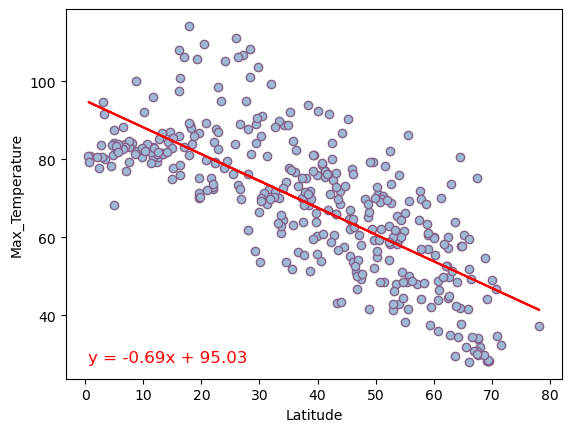

In [201]:
# Define a function to create Linear Regression plots
def chart(x,y):
    lr = linregress(x,y)
    regress_values = x * lr.slope + lr.intercept
    
    plt.scatter(x,y,color='#9EB9D4', edgecolors='#856088')
    plt.plot(x,regress_values,"r-")
    
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    
    line_eq = "y = " + str(round(lr.slope,2)) + "x + " + str(round(lr.intercept,2))
    plt.annotate(line_eq, (min(x), min(y)), fontsize=12, color="red")
   
    print(f"The r-value is: {lr.rvalue}")
    plt.show()
    
# Linear regression on Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df.Latitude>0]

x = northern_hemi_df.Latitude
y = northern_hemi_df.Max_Temperature

chart(x,y)

The r-value is: 0.8433719708125711


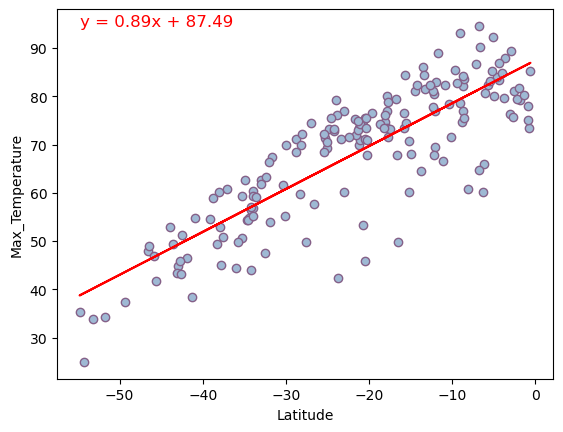

In [166]:
def chart(x,y):
    lr = linregress(x,y)
    regress_values = x * lr.slope + lr.intercept
    
    plt.scatter(x,y,color='#9EB9D4', edgecolors='#856088')
    plt.plot(x,regress_values,"r-")
    
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    
    line_eq = "y = " + str(round(lr.slope,2)) + "x + " + str(round(lr.intercept,2))
    plt.annotate(line_eq, (min(x), max(y)), fontsize=12, color="red")
   
    print(f"The r-value is: {lr.rvalue}")
    plt.show()
  
# Linear regression on Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df.Latitude<0]

x = southern_hemi_df.Latitude
y = southern_hemi_df.Max_Temperature

chart(x,y)

**Discussion about the linear relationship:** 
Temperature vs Latitud data shows that the rvalue is on a negative correlation, for the Northern hemisphere. meaning that the futher north, the higher the latitude, the temp changes and tends to be decresing since is further away from the equator. In contrast the Southern Hemisphere shows a positive correlation between r-value and Y, as one latitude increases, the temperature would too. In both cases data show a paralelal behavior toward eachother between temperature and latitude. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.01024619616006365


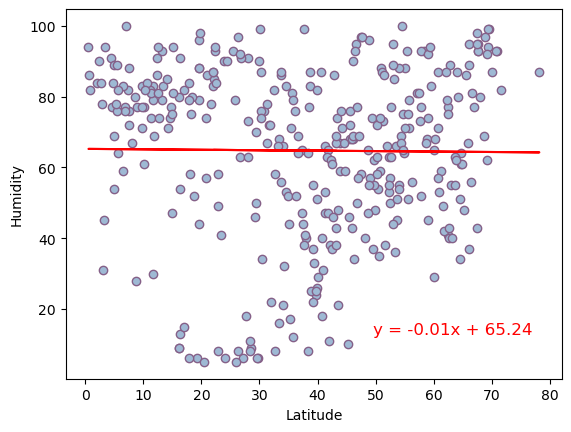

In [167]:
def chart(x, y):
    lr = linregress(x, y)
    regress_values = x * lr.slope + lr.intercept
    
    plt.scatter(x,y,color='#9EB9D4', edgecolors='#856088')
    plt.plot(x, regress_values, "r-")
    
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    
    line_eq = "y = " + str(round(lr.slope, 2)) + "x + " + str(round(lr.intercept, 2))
    
    # Specify the position for the equation annotation within the plot area
    plt.annotate(line_eq, (max(x), min(y)), xytext=(-120, 20), textcoords='offset points', fontsize=12, color="red")
    
    print(f"The r-value is: {lr.rvalue}")
    plt.show()

# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df.Latitude > 0]
x = northern_hemi_df.Latitude
y = northern_hemi_df.Humidity
chart(x, y)

The r-value is: -0.17046147366633818


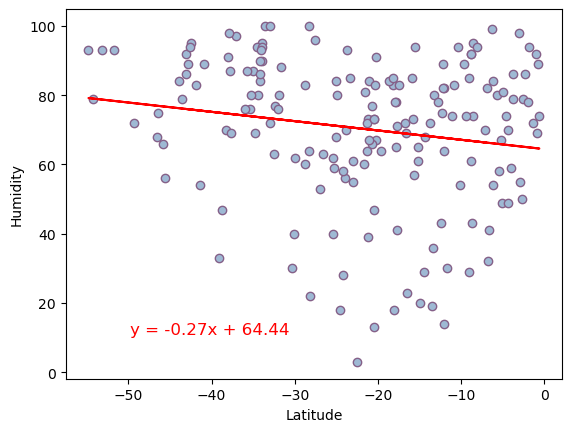

In [168]:
def chart(x, y):
    lr = linregress(x, y)
    regress_values = x * lr.slope + lr.intercept
    
    plt.scatter(x,y,color='#9EB9D4', edgecolors='#856088')
    plt.plot(x, regress_values, "r-")
    
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    
    line_eq = "y = " + str(round(lr.slope, 2)) + "x + " + str(round(lr.intercept, 2))
    
    # Specify the position for the equation annotation within the plot area
    plt.annotate(line_eq, (min(x), min(y)), xytext=(30, 20), textcoords='offset points', fontsize=12, color="red")
    
    print(f"The r-value is: {lr.rvalue}")
    plt.show()

# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df.Latitude<0]

x = southern_hemi_df.Latitude
y = southern_hemi_df.Humidity

chart(x,y)

**Discussion about the linear relationship:**
Humidity vs Latitude Data Results shows:
Northern Hemisphere r-value = -0.0102 and y = -0.01x +65.24
Southern Hemisphere he r-value is: -0.1704 and y = -0.27x + 64.44

Negative correclation for this category in both hemispheres. However talking numbers the southern hemisphere shows when latitude increments gradually, humidity decresses. A small difference between hemispheres' weather.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0507787740685603


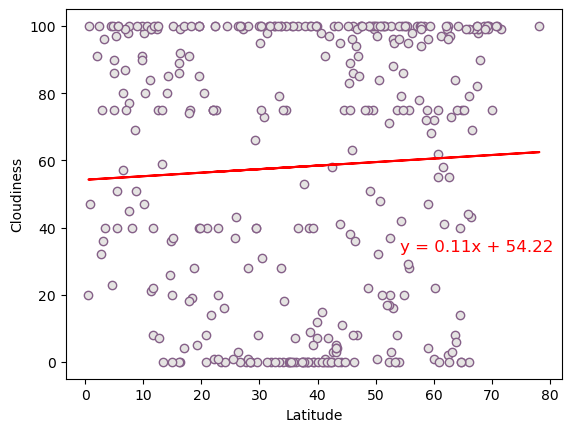

In [198]:
def chart(x, y):
    lr = linregress(x, y)
    regress_values = x * lr.slope + lr.intercept
    
    plt.scatter(x, y, color='#E5E4E2', edgecolors='#856088') # Change the color to purple
    plt.plot(x, regress_values, "r-")  
    
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    
    line_eq = "y = " + str(round(lr.slope, 2)) + "x + " + str(round(lr.intercept, 2))
    
    # Specify the position for the equation annotation within the plot area
    plt.annotate(line_eq, (max(x), min(y)), xytext=(-100, 80), textcoords='offset points', fontsize=12, color="red")
    
    print(f"The r-value is: {lr.rvalue}")
    plt.show()

# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df.Latitude > 0]
x = northern_hemi_df.Latitude
y = northern_hemi_df.Cloudiness
chart(x, y)

The r-value is: 0.006309086521210306


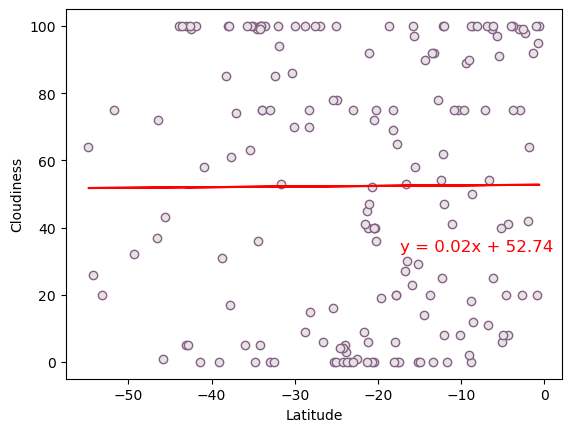

In [152]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df.Latitude<0]

x = southern_hemi_df.Latitude
y = southern_hemi_df.Cloudiness

chart(x,y)

**Discussion about the linear relationship:** 
Cloudiness vs Latitude Data Results shows: 
Northern Hemisphere r-value is: 0.05077 and y = 0.01x+54.22
Southern Hemisphere r-value is: 0.00630 and y = 0.02x+52.74 
As shown in the graphs above the lines are flatten and show not much correlation between Cloudiness and Latitude, both hemisperes are poistive, however and numbers are low.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.018363423308027947


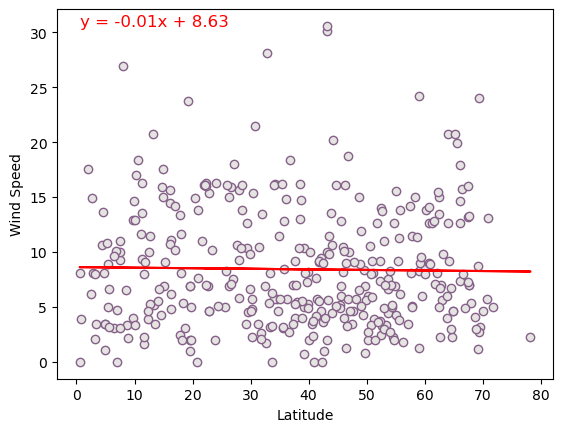

In [199]:
def chart(x, y):
    lr = linregress(x, y)
    regress_values = x * lr.slope + lr.intercept
    
    plt.scatter(x, y, color='#E5E4E2', edgecolors='#856088') # Change the color to purple
    plt.plot(x, regress_values, "r-")  
    
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    
    line_eq = "y = " + str(round(lr.slope, 2)) + "x + " + str(round(lr.intercept, 2))
    
    # Specify the position for the equation annotation within the plot area
    plt.annotate(line_eq, (min(x), max(y)), fontsize=12, color="red")
    
    print(f"The r-value is: {lr.rvalue}")
    plt.show()
    
# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df.Latitude>0]

x = northern_hemi_df.Latitude
y = northern_hemi_df['Wind Speed']

chart(x,y)

The r-value is: -0.21766424818633598


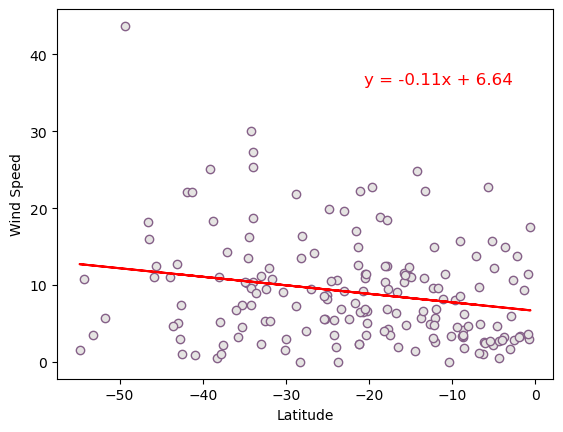

In [200]:
def chart(x, y):
    lr = linregress(x, y)
    regress_values = x * lr.slope + lr.intercept
    
    plt.scatter(x, y, color='#E5E4E2', edgecolors='#856088') # Change the color to purple
    plt.plot(x, regress_values, "r-")  
    
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    
    line_eq = "y = " + str(round(lr.slope, 2)) + "x + " + str(round(lr.intercept, 2))
    
    # Specify the position for the equation annotation within the plot area
    plt.annotate(line_eq, (max(x), min(y)), xytext=(-120, 200), textcoords='offset points', fontsize=12, color="red")
    
    print(f"The r-value is: {lr.rvalue}")
    plt.show()
    
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df.Latitude<0]

x = southern_hemi_df.Latitude
y = southern_hemi_df ['Wind Speed']

chart(x, y)

**Discussion about the linear relationship:**
Wind Speed vs Latitude Data Results shows: 
Northern Hemisphere r-value is: -0.01836  and y = -0.01x+8.63
Southern Hemisphere  r-value is: -0.21766  and y =  -0.11 x + 6.64
This category shows negative correlation. However the southern hemisphere shows a bit stronger compared, in same case of cloudiness and the weather effects in lower latitudes. Also wind speed tends to decressed as it travels closer towards the equator.